In [1]:
from utils import get_human_map_for_filename
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import data

In [2]:
xai_df = pd.read_pickle("2_xai_with_distances.pickle")
xai_df.head(1)

,filename,index,img_path,caption,foil,linguistic_phenomena,model_shap_map,n_image_variants,model,model_shap_positive_normalized,human_map,shuffled_column_human_map,EMD_to_human,RC_to_human,EMD_to_scrambled_human,RC_to_scrambled_human,EMD_to_shuffled_column_human,RC_to_shuffled_column_human
1,licking_291.jpg,1,../../VALSE_data/images/swig/licking_291.jpg,A cow licks its fur.,A cow wrinkles its fur.,actions,"[[-0.055763863715583284, 0.022721240122336894,...",172,LXMERT,"[[0.07359886674465907, 0.02998819329604594, 0....","[[0.0014743265527438847, 0.01573516504970489, ...","[[0.002197957601655422, 0.014077928917412092, ...",0.983263,-0.058824,0.72668,0.388235,0.616612,0.391176


## Explore

### Most and least distant by RC

In [3]:
xai_sorted = xai_df.sort_values(by=['RC_to_human'])

closest:

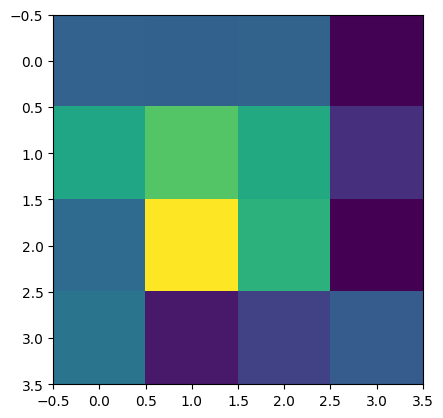

In [4]:
plt.imshow(xai_sorted['model_shap_positive_normalized'].iloc[-1]) # show shap map of most correlated RC (last element)
filename = list(xai_sorted['filename'])[-1]
human_map = get_human_map_for_filename(filename)

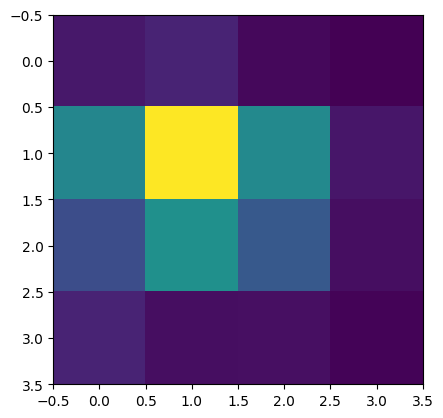

In [5]:
plt.imshow(human_map)

# Create graphs for each model

Note:
- shuffled = whole list of human maps is shuffled, each map is kept intact
- scrambled = each map is kept in place but scrambled, its actual elements are shuffled around

In [6]:
model_names = ["FLAVA", "CLIP", "LXMERT", "SigLip"]

/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_68465/1976589913.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(metric_to_human, shade=True, color="red", label=f'{metric} to human', linestyle="-")
/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_68465/1976589913.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(metric_to_shuffled, shade=True, color="purple", label=f'{metric} to shuffled list human', linestyle="--")
/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_68465/1976589913.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(metric_to_human, shade=True, color="red", label=f'

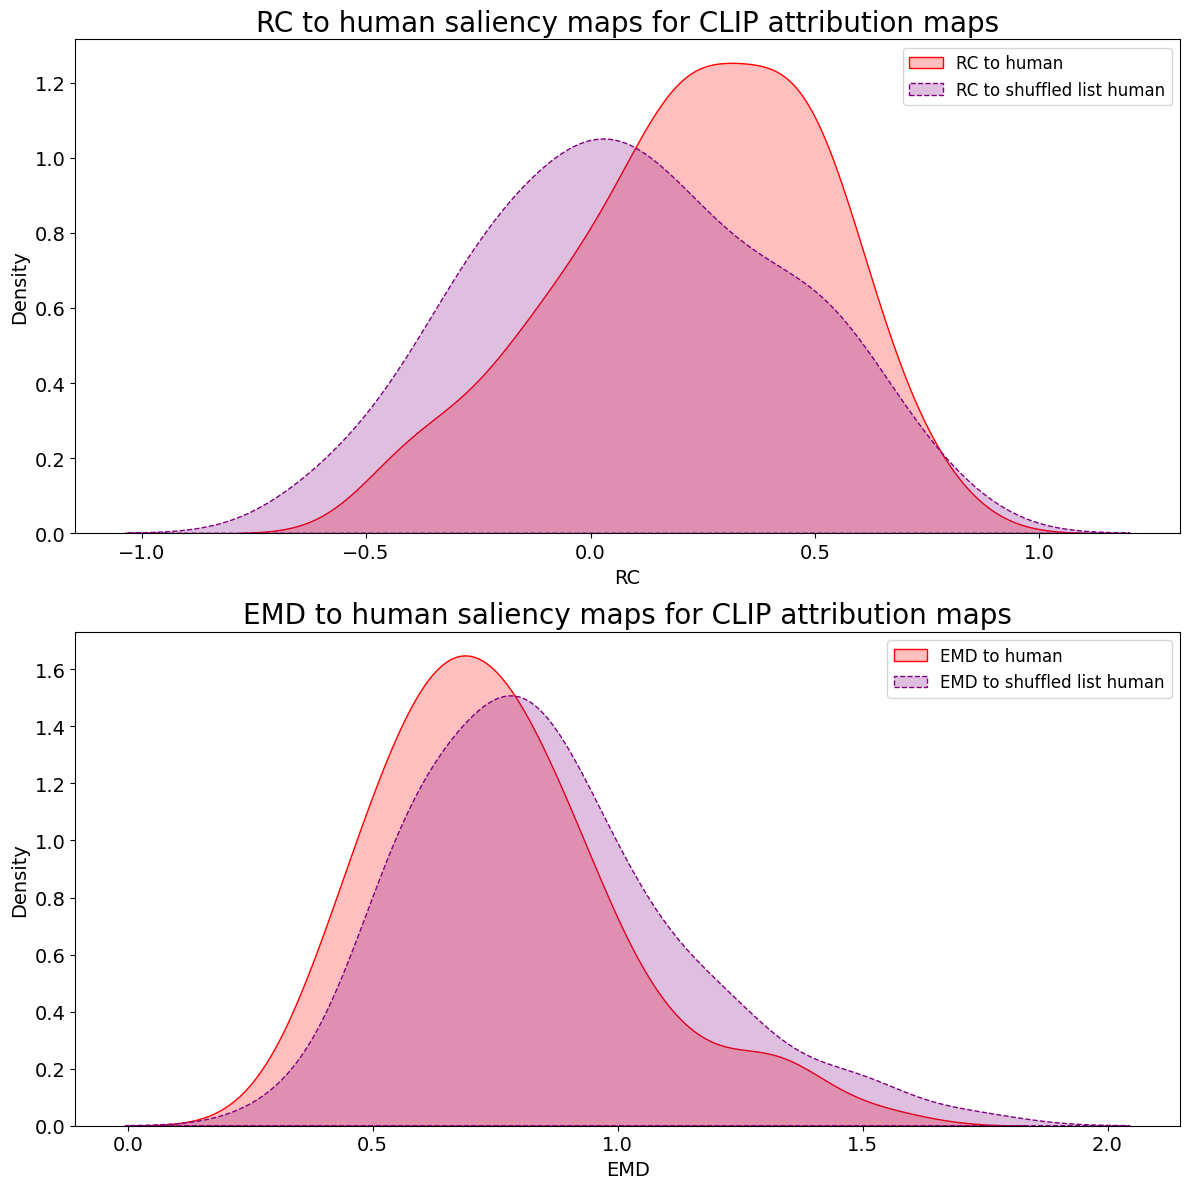

In [7]:
def graph_distance_metrics(model_name):

    """For a given model name graph various distance/similarity human maps as histogram, also rank correlation to humans as histogram."""

    # define what metrics we want to get
    # this is used to access the relevant column names
    metric_names = ['RC', 'EMD']
    nr_metrics = len(metric_names)

    plt.figure(figsize=(12, 6*nr_metrics))

    # Set larger font sizes
    plt.rcParams['axes.titlesize'] = 20  # Title font size
    plt.rcParams['axes.labelsize'] = 14  # Axis label font size
    plt.rcParams['xtick.labelsize'] = 14  # X-axis tick font size
    plt.rcParams['ytick.labelsize'] = 14  # Y-axis tick font size
    plt.rcParams['legend.fontsize'] = 12  # Legend font size

    for index, metric in enumerate(metric_names):
        metric_to_human = xai_df[xai_df['model']==model_name][f'{metric}_to_human']
        # metric_to_scrambled = xai_df[xai_df['model']==model_name][f'{metric}_to_scrambled_human']
        metric_to_shuffled = xai_df[xai_df['model']==model_name][f'{metric}_to_shuffled_column_human']
        # metric_reduced_shap = xai_df[xai_df['model']==model_name][f'{metric}_with_reduced_shap']

        plt.subplot(nr_metrics, 1, index+1) 
        sns.kdeplot(metric_to_human, shade=True, color="red", label=f'{metric} to human', linestyle="-")
        # sns.kdeplot(metric_to_scrambled, shade=True, color="black", label=f'{metric} to scrambled human', linestyle="--")
        sns.kdeplot(metric_to_shuffled, shade=True, color="purple", label=f'{metric} to shuffled list human', linestyle="--")
        # sns.kdeplot(metric_reduced_shap, shade=True, color="blue", label=f'{metric} to human with reduced SHAP (top n patches)', linestyle="-")

        if metric == "ChiSquare":
            plt.xlim((-10000,10000))

        plt.title(f'{metric} to human saliency maps for {model_name} attribution maps')
        plt.xlabel(metric)
        plt.ylabel('Density')
        plt.legend()

    plt.tight_layout()
    plt.show()

graph_distance_metrics("CLIP")

/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_68465/1976589913.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(metric_to_human, shade=True, color="red", label=f'{metric} to human', linestyle="-")
/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_68465/1976589913.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(metric_to_shuffled, shade=True, color="purple", label=f'{metric} to shuffled list human', linestyle="--")
/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_68465/1976589913.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(metric_to_human, shade=True, color="red", label=f'

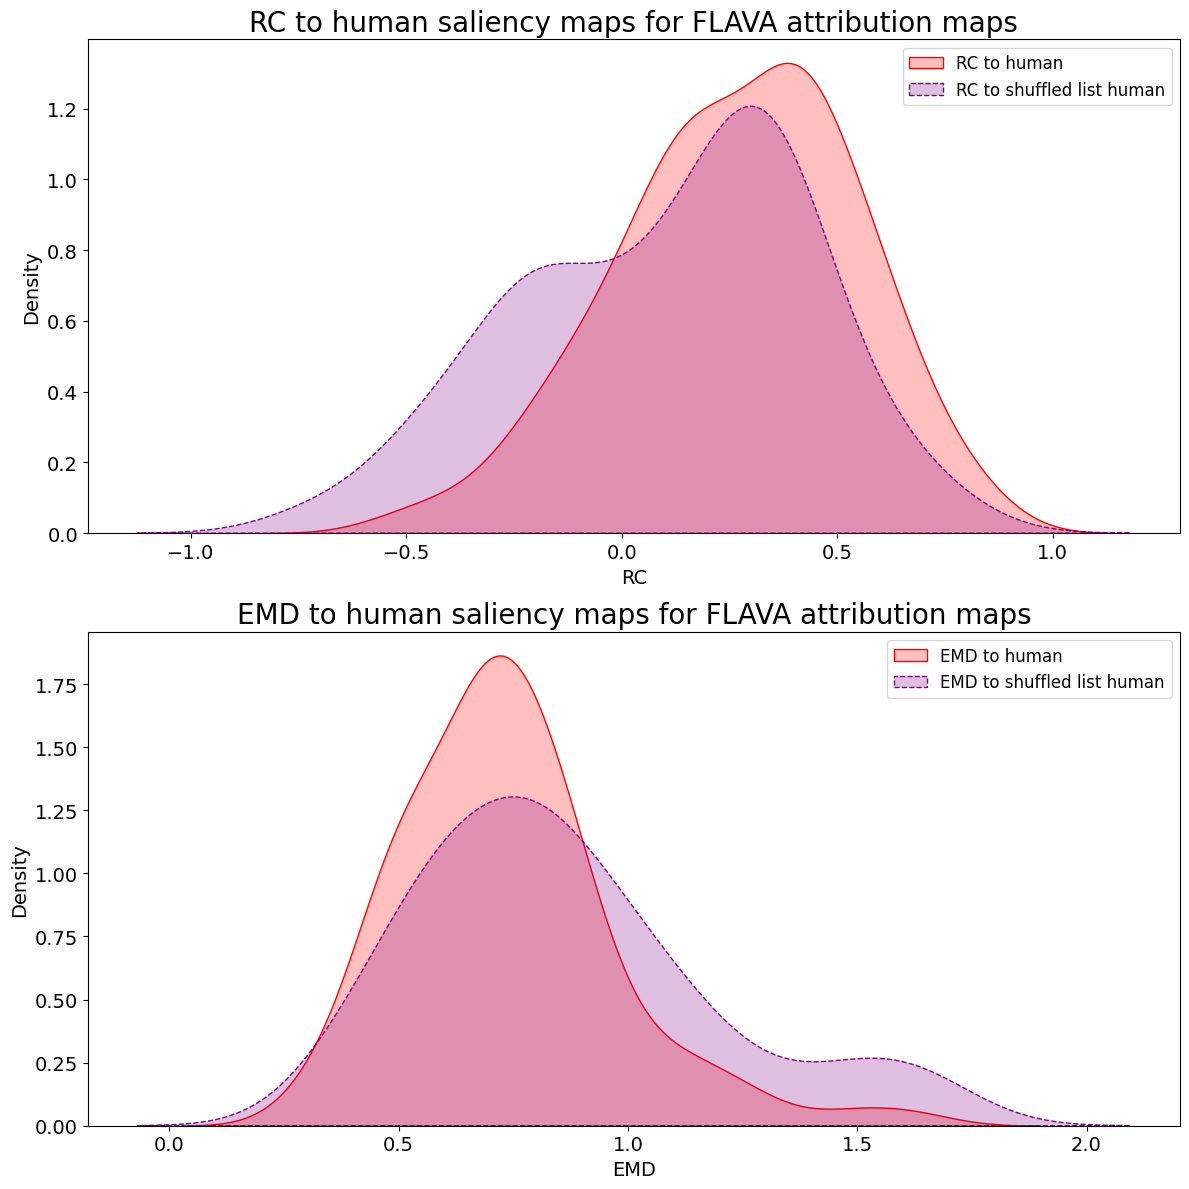

In [8]:
graph_distance_metrics("FLAVA")

/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_68465/1976589913.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(metric_to_human, shade=True, color="red", label=f'{metric} to human', linestyle="-")
/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_68465/1976589913.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(metric_to_shuffled, shade=True, color="purple", label=f'{metric} to shuffled list human', linestyle="--")
/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_68465/1976589913.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(metric_to_human, shade=True, color="red", label=f'

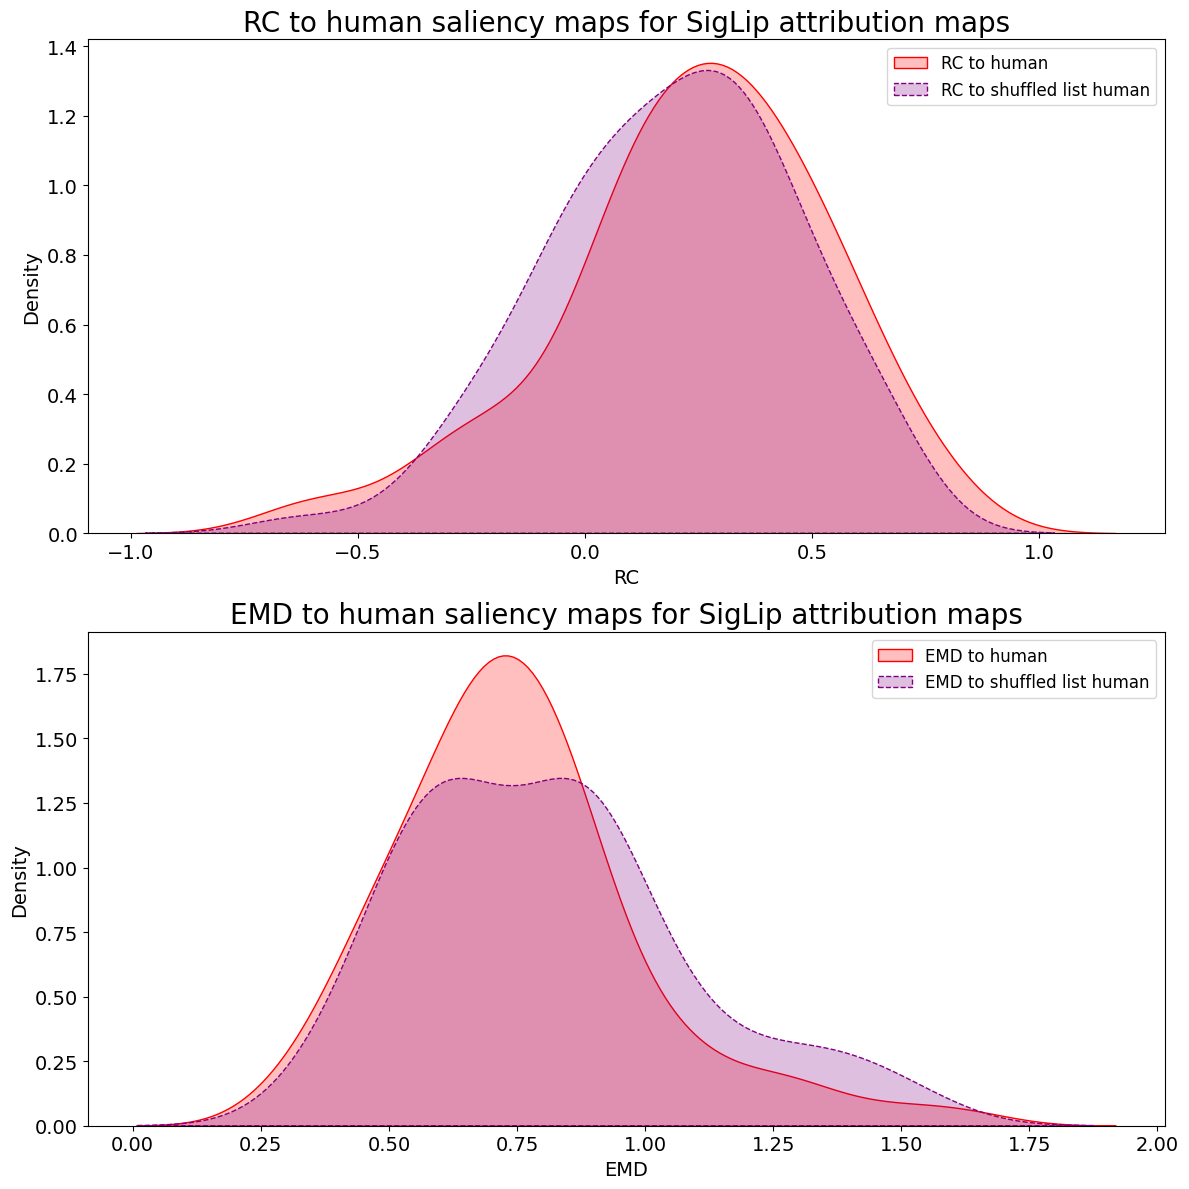

In [9]:
graph_distance_metrics("SigLip")

/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_68465/1976589913.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(metric_to_human, shade=True, color="red", label=f'{metric} to human', linestyle="-")
/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_68465/1976589913.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(metric_to_shuffled, shade=True, color="purple", label=f'{metric} to shuffled list human', linestyle="--")
/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_68465/1976589913.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(metric_to_human, shade=True, color="red", label=f'

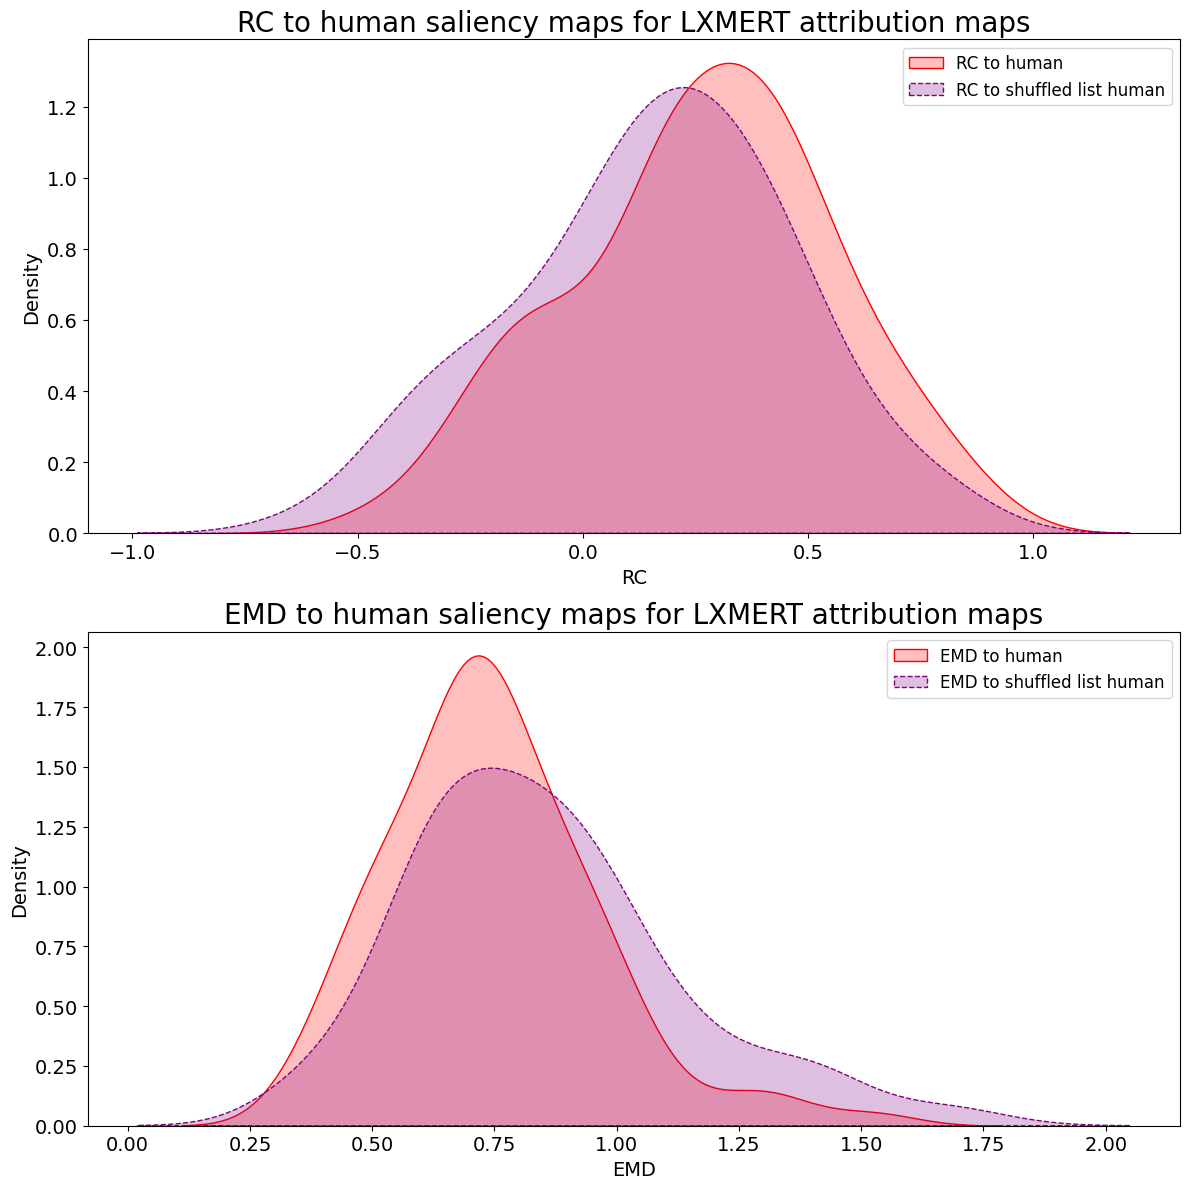

In [10]:
graph_distance_metrics("LXMERT")

### Inspect scores

In [11]:
xai_df[xai_df['caption']=='A woman punches a man.']

,filename,index,img_path,caption,foil,linguistic_phenomena,model_shap_map,n_image_variants,model,model_shap_positive_normalized,human_map,shuffled_column_human_map,EMD_to_human,RC_to_human,EMD_to_scrambled_human,RC_to_scrambled_human,EMD_to_shuffled_column_human,RC_to_shuffled_column_human
98,punching_28.jpg,98,../../VALSE_data/images/swig/punching_28.jpg,A woman punches a man.,A man punches a woman.,actions,"[[0.001985210599286802, 0.0006472957097685139,...",172,LXMERT,"[[0.01277897274444515, 0.004166698604017024, 9...","[[1.5557001587065315e-05, 0.000440331635497182...","[[0.005949095264115689, 0.05563068752315869, 0...",0.895090,0.382353,0.993023,0.420588,1.018223,-0.023529
112,punching_28.jpg,13,../../VALSE_data/images/swig/punching_28.jpg,A woman punches a man.,A man punches a woman.,actions,"[[0.1957489252090454, -0.039440274238586426, -...",172,CLIP,"[[0.1792734215517951, 0.03612072404556826, 0.0...","[[1.5557001587065315e-05, 0.000440331635497182...","[[0.0, 0.029749861296620092, 0.029431787682925...",0.775711,0.241176,0.771626,0.173529,0.834640,-0.145695
233,punching_28.jpg,35,../../VALSE_data/images/swig/punching_28.jpg,A woman punches a man.,A man punches a woman.,actions,"[[0.22677472233772278, -0.0004987418651580811,...",172,SigLip,"[[0.20789505362412042, 0.00045722012459227903,...","[[1.5557001587065315e-05, 0.000440331635497182...","[[6.50639132233009e-05, 0.000543229080638214, ...",0.802662,0.341176,1.019940,-0.502941,0.887610,0.100000
310,punching_28.jpg,13,../../VALSE_data/images/swig/punching_28.jpg,A woman punches a man.,A man punches a woman.,actions,"[[-0.19651955366134644, -0.07269126176834106, ...",172,FLAVA,"[[0.10649207920485076, 0.03939070418954095, 0....","[[1.5557001587065315e-05, 0.000440331635497182...","[[0.04172433292391593, 0.07406707109547254, 0....",0.695313,0.358824,0.614782,0.088235,0.498283,0.332353
